In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sS = pd.read_csv("sampleSubmission.csv")

In [3]:
train['推薦類型'].replace(['肌力',"柔軟度","心肺","肌耐力","error","錯誤","無此類別"],[0,1,2,3,np.nan,np.nan,np.nan] , inplace = True)
train = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train['推薦類型'] = train['推薦類型'].astype('int64')

In [5]:
BMI = -9
BMI2 = 9
out_BMI = train.query("@BMI <BMI < @BMI2")
out_BMI

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,推薦類型
0,1.0,957.0,0.0,1.0,1.0,0.0,-2.0,0.0,1.0,1.0,1.0,0.0,-3.0,0.0,-3.0,0
6,0.0,1134.0,0.0,0.0,1.0,1.0,0.0,1.0,-4.0,0.0,1.0,0.0,1.0,1.0,-4.0,2
11,0.0,1644.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-2.0,1.0,0.0,0.0,1.0,1.0,1
22,0.0,3764.0,0.0,-2.0,0.0,0.0,1.0,-5.0,-3.0,0.0,0.0,-4.0,0.0,0.0,1.0,1
24,1.0,2484.0,0.0,0.0,1.0,-3.0,0.0,1.0,1.0,-5.0,1.0,-3.0,1.0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,0.0,3297.0,0.0,1.0,0.0,-5.0,0.0,-5.0,-5.0,0.0,1.0,1.0,0.0,0.0,0.0,0
26407,1.0,3121.0,0.0,-4.0,-2.0,-4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,3
26412,1.0,336.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1
26420,0.0,2149.0,0.0,-3.0,-2.0,1.0,-3.0,-3.0,1.0,0.0,-5.0,-2.0,0.0,-5.0,1.0,1


<AxesSubplot:>

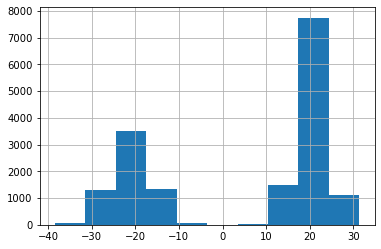

In [6]:
out_BMI_list =out_BMI.index.tolist()
train = train.drop(out_BMI_list)
train["BMI"].hist()

In [13]:
BMI = 0

out_BMI = train.query("BMI < @BMI")
out_BMI_list =out_BMI.tolist()
out_BMI_list

AttributeError: 'DataFrame' object has no attribute 'tolist'

<AxesSubplot:>

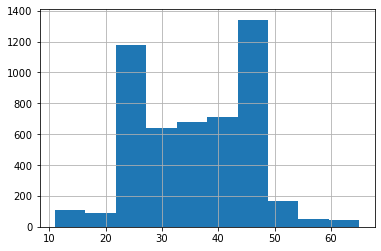

In [14]:
 test["年齡"].hist()